In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from vizman import viz
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import bct
from matplotlib.axis import Axis 

default_things:str = "../Pyvizman/vizman/"
default_sizes:dict = viz.load_data_from_json(default_things+"sizes.json")
default_colors:dict = viz.load_data_from_json(default_things+"colors.json")
default_cmaps:dict = viz.give_colormaps(default_things+"colors.json")

viz.set_visual_style(json_color_path=default_things+"colors.json")

In [3]:
default_things:str = "../Pyvizman/vizman/"
default_sizes:dict = viz.load_data_from_json(default_things+"sizes.json")
default_colors:dict = viz.load_data_from_json(default_things+"colors.json")
default_cmaps:dict = viz.give_colormaps(default_things+"colors.json")

viz.set_visual_style(json_color_path=default_things+"colors.json")

In [4]:
datasets_path:str = "datasets/binary/"

synthetic_networks:np.ndarray = np.load(datasets_path+"synthetic_mats_graded_reciprocity.npy")
original_synthetics:np.ndarray = np.load(datasets_path+"original_synthetic_mats.npy")
human:np.ndarray = np.load(datasets_path+"human_struct_scale125.npy")
macaque:np.ndarray = np.load(datasets_path+"macaque_modha.npy")
rat:np.ndarray = np.load(datasets_path+"rat.npy")
mouse:np.ndarray = np.load(datasets_path+"mouse.npy")
drosophila:np.ndarray = np.load(datasets_path+"drosophila.npy")
c_elegans:np.ndarray = np.load(datasets_path+"celegans.npy")

In [5]:
original_synthetics.shape

(256, 256, 50, 3)

In [6]:
example_random_network:np.ndarray = original_synthetics[:,:,0,0].copy()
example_sw_network:np.ndarray = original_synthetics[:,:,0,1].copy()
example_modular_network:np.ndarray = original_synthetics[:,:,0,2].copy()

In [7]:
example_modular_community_labels:np.ndarray = np.zeros(example_modular_network.shape[0]).astype(int)
example_modular_community_labels[:64]=0
example_modular_community_labels[65:128]=1
example_modular_community_labels[129:192]=2
example_modular_community_labels[193:256]=3

c_elegans_community_labels:np.ndarray = bct.modularity_louvain_dir(c_elegans[:,:,0],0.39,seed=2024)[0]
np.unique(c_elegans_community_labels)

array([1, 2, 3, 4, 5, 6, 7, 8])

In [8]:
rng = np.random.default_rng(2024)
mask:np.ndarray = rng.choice([0,1],size=example_modular_network.shape,p=[0.9,0.1])

In [9]:
sns_heatmap_kwargs={'cmap': default_cmaps["bw_hb"],'xticklabels':False, 'yticklabels':False,'rasterized':True}

In [10]:
community_to_color:dict = {
    0 : "#E84653",
    1 : "#E6B213",
    2 : "#A6587C",
    3 : "#0F14F7",
    4 : "#6A7870",
    5 : "#F99465",
    6 : "#a1d4ca",
    7 : "#3FA5C4",
    8 : "#BF003F",
}

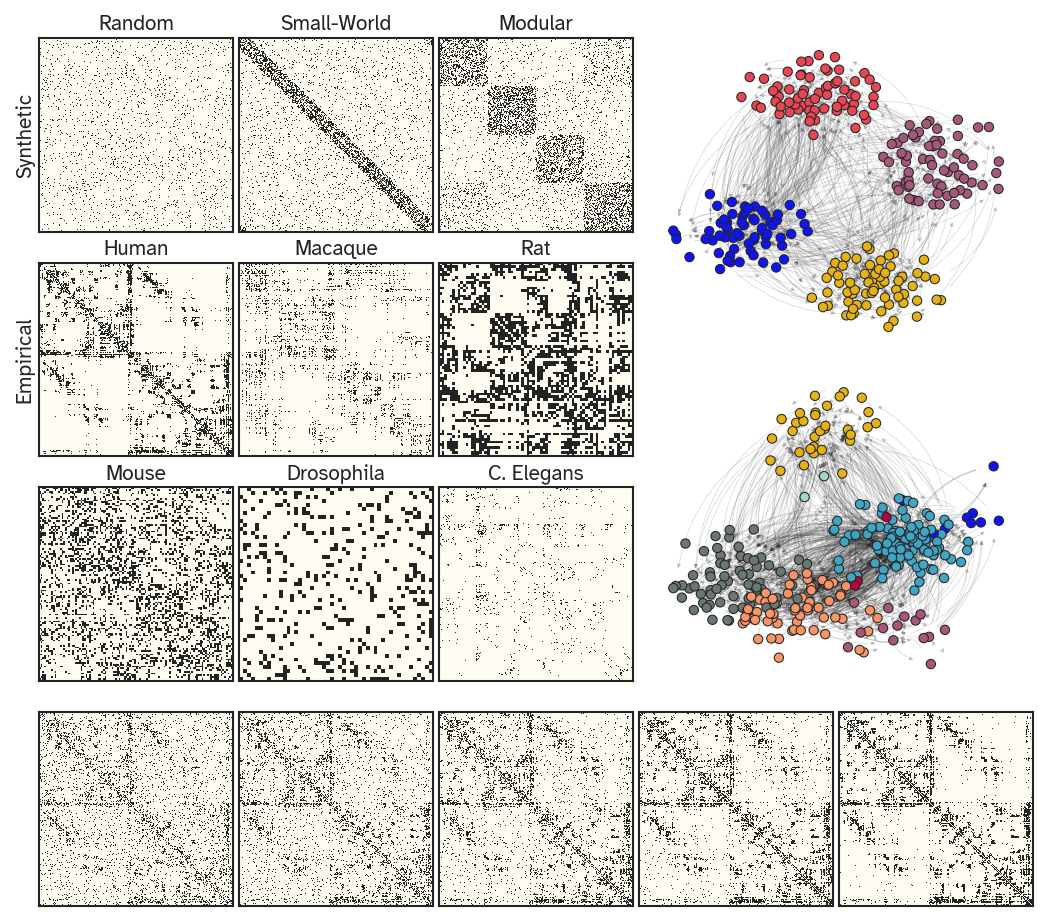

In [12]:
fig, axes = plt.subplot_mosaic([["A", "B", "C","Net1","Net1"],
                                ["A", "B", "C","Net1","Net1"],
                                ["D", "E", "F","Net1","Net1"],
                                ["D", "E", "F","Net2","Net2"],
                                ["G", "H", "I","Net2","Net2"],
                                ["G", "H", "I","Net2","Net2"],
                                ["R1", "R3", "R5","R7","R9"],
                                ["R1", "R3", "R5","R7","R9"]],
                               figsize=viz.cm_to_inch([18,16]),
                               dpi=150)

# Plotting the adjacency matrices
## Synthetics
viz.plot_matrix(example_random_network,
                cbar=False,
                community_labels=None,
                community_cmap=None,
                axis=axes["A"],
                sns_kwargs=sns_heatmap_kwargs)
viz.plot_matrix(example_sw_network,
                cbar=False,
                community_labels=None,
                community_cmap=None,
                axis=axes["B"],
                sns_kwargs=sns_heatmap_kwargs)
viz.plot_matrix(example_modular_network,
                cbar=False,
                community_labels=None,
                community_cmap=None,
                axis=axes["C"],
                sns_kwargs=sns_heatmap_kwargs)

## Empiricals
viz.plot_matrix(human[:,:,-1],
                cbar=False,
                community_labels=None,
                community_cmap=None,
                axis=axes["D"],
                sns_kwargs=sns_heatmap_kwargs)
viz.plot_matrix(macaque[:,:,-1],
                cbar=False,
                community_labels=None,
                community_cmap=None,
                axis=axes["E"],
                sns_kwargs=sns_heatmap_kwargs)
viz.plot_matrix(rat[:,:,-1],
                cbar=False,
                community_labels=None,
                community_cmap=None,
                axis=axes["F"],
                sns_kwargs=sns_heatmap_kwargs)
viz.plot_matrix(mouse[:,:,-1],
                cbar=False,
                community_labels=None,
                community_cmap=None,
                axis=axes["G"],
                sns_kwargs=sns_heatmap_kwargs)
viz.plot_matrix(drosophila[:,:,-1],
                cbar=False,
                community_labels=None,
                community_cmap=None,
                axis=axes["H"],
                sns_kwargs=sns_heatmap_kwargs)
viz.plot_matrix(c_elegans[:,:,-1],
                cbar=False,
                community_labels=None,
                community_cmap=None,
                axis=axes["I"],
                sns_kwargs=sns_heatmap_kwargs)

# Plotting the community structure

viz.plot_network(example_modular_network*mask,
                 example_modular_community_labels,
                 community_to_color,
                 11151211,axis=axes["Net1"])

viz.plot_network(c_elegans[:,:,-1],
                 c_elegans_community_labels,
                 community_to_color,
                 11151211,axis=axes["Net2"])

# Plotting the reciprocity examples
for example in range(1,11,2):
    viz.plot_matrix(human[:,:,example],
                    cbar=False,
                    community_labels=None,
                    community_cmap=None,
                    axis=axes[f"R{example}"],
                    sns_kwargs=sns_heatmap_kwargs)

# Axes labels and so on [read in Zizek]
axes["A"].set_title("Random")
axes["B"].set_title("Small-World")
axes["C"].set_title("Modular")
axes["D"].set_title("Human")
axes["E"].set_title("Macaque")
axes["F"].set_title("Rat")
axes["G"].set_title("Mouse")
axes["H"].set_title("Drosophila")
axes["I"].set_title("C. Elegans")

axes["A"].set_ylabel("Synthetic")
axes["D"].set_ylabel("Empirical")

sns.despine(ax=axes["Net1"],left=True,bottom=True)
sns.despine(ax=axes["Net2"],left=True,bottom=True)
Axis.set_rasterized(axes["Net1"],True)
Axis.set_rasterized(axes["Net2"],True)
fig.tight_layout(w_pad=0.3, h_pad=0.4)
plt.savefig("figures/networks.pdf",dpi=600)